### Imports

In [25]:
import json
import os
import re
import time

import pandas as pd
import requests
import librosa
import numpy as np
import matplotlib.pyplot as plt

### Function for API Call to Pandas df

In [2]:
def query(query: str = "", country: str = "", page: int = 1) -> pd.DataFrame:
    """
    This function takes in the query(species), country with cnt: at the start,
    page as page number. This will output a dataframe from the reqeust of the 
    xeno canto api
    ---
    Args: query:str,country:str, page:str
    ---
    Returns: Dataframe consisting of the data retrieved from the api
    """
    try:
        response = requests.get(
            f"https://xeno-canto.org/api/2/recordings?query={query}{country}&page={page}",
            timeout=5
        )
        if response.status_code != 200:
            print(f"Request failed with status code {response.status_code}")
            return None
        data = response.json()
        if 'recordings' not in data:
            print("No recordings found")
            return None
        recordings = data['recordings']
        df = pd.json_normalize(recordings)
        time.sleep(1)
        
        json_obj = json.loads(response.text)
        num_recordings = json_obj['numRecordings']
        num_species = json_obj['numSpecies']
        page = json_obj['page']
        num_pages = json_obj['numPages']

        print("Number of recordings: ", num_recordings),
        print("Number of species: ", num_species)
        print("Page: ", page)
        print("Number of pages: ", num_pages)
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [3]:
df_temp2 = query(query="Pycnonotus+goiavier")

Number of recordings:  114
Number of species:  1
Page:  1
Number of pages:  1


In [4]:
df_temp3 = query(query="Eudynamys scolopaceus")

Number of recordings:  338
Number of species:  1
Page:  1
Number of pages:  1


In [5]:
page = [1,2,3]
df_int = pd.DataFrame()

for i in page:
    df_temp = query(query="Tringa+totanus",page=i)
    df_int = df_int.append(df_temp)

Number of recordings:  1230
Number of species:  1
Page:  1
Number of pages:  3
Number of recordings:  1230
Number of species:  1
Page:  2
Number of pages:  3
Number of recordings:  1230
Number of species:  1
Page:  3
Number of pages:  3


In [6]:
df_int = df_int.append(df_temp2)
df_int = df_int.append(df_temp3)

In [7]:
df_int

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,dvc,mic,smp,sono.small,sono.med,sono.large,sono.full,osci.small,osci.med,osci.large
0,786603,Tringa,totanus,,birds,Common Redshank,David Tattersley,United Kingdom,"Great Britain (near Huddersfield), West Yorks...",53.6719,...,,,44100,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/ff...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/ff...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/ff...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/ff...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/wa...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/wa...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/wa...
1,785616,Tringa,totanus,,birds,Common Redshank,Feliu López i Gelats,Spain,Premià de Mar,41.4875,...,,,44100,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/ff...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/ff...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/ff...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/ff...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/wa...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/wa...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/wa...
2,783687,Tringa,totanus,,birds,Common Redshank,Domagoj Tomičić,Croatia,"Oprisavci, Općina Oprisavci, Brodsko-posavska ...",45.1408,...,Huawei P8,,44100,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/ff...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/ff...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/ff...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/ff...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/wa...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/wa...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/wa...
3,780796,Tringa,totanus,,birds,Common Redshank,Paul Coiffard,France,"Rochefort, Charente-Maritime, Nouvelle-Aquitaine",45.9341,...,Audiomoth 1.2.0,2x Primo EM272 Mono,44100,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/ff...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/ff...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/ff...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/ff...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/wa...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/wa...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/wa...
4,780672,Tringa,totanus,,birds,Common Redshank,Paul Kelly,Ireland,"Tacumshin Lake (East End), County Wexford",52.1963,...,Dodotronic parabola.,Tascam.,44100,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/ff...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/ff...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/ff...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/ff...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/wa...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/wa...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/wa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,283132,Eudynamys,scolopaceus,,birds,Asian Koel,Ko Chie-Jen (Jerome),Taiwan,"Xindian District (near Taipei), New Taipei City",24.9856,...,,,44100,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/ff...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/ff...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/ff...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/ff...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/wa...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/wa...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/wa...
334,163889,Eudynamys,scolopaceus,,birds,Asian Koel,Albert Lastukhin,India,"Bardez (near Calangute), North Goa, Goa",15.5442,...,,,48000,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/ff...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/ff...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/ff...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/ff...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/wa...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/wa...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/wa...
335,153245,Eudynamys,scolopaceus,,birds,Asian Koel,Sander Pieterse,Thailand,"trail to Had Lek, Ko Miang, Mu Ko Similan Nati...",8.5691,...,,,44100,//xeno-canto.org/sounds/uploaded/HMLZGZJENG/ff...,//xeno-canto.org/sounds/uploaded/HMLZGZJENG/ff...,//xeno-canto.org/sounds/uploaded/HMLZGZJENG/ff...,//xeno-canto

### Meta Data

In [8]:
df_int['sp'].value_counts()

totanus        1230
scolopaceus     338
goiavier        114
Name: sp, dtype: int64

In [9]:
df_int.columns

Index(['id', 'gen', 'sp', 'ssp', 'group', 'en', 'rec', 'cnt', 'loc', 'lat',
       'lng', 'alt', 'type', 'sex', 'stage', 'method', 'url', 'file',
       'file-name', 'lic', 'q', 'length', 'time', 'date', 'uploaded', 'also',
       'rmk', 'bird-seen', 'animal-seen', 'playback-used', 'temp', 'regnr',
       'auto', 'dvc', 'mic', 'smp', 'sono.small', 'sono.med', 'sono.large',
       'sono.full', 'osci.small', 'osci.med', 'osci.large'],
      dtype='object')

   
This is the schema obtained from the website, which is missing ['sono.small', 'sono.med', 'sono.large','sono.full', 'osci.small', 'osci.med', 'osci.large']

* id: the catalogue number of the recording on xeno-canto
* gen: the generic name of the species
* sp: the specific name (epithet) of the species
* ssp: the subspecies name (subspecific epithet)
* group: the group to which the species belongs (birds, grasshoppers)
* en: the English name of the species
* rec: the name of the recordist
* cnt: the country where the recording was made
* loc: the name of the locality
* lat: the latitude of the recording in decimal coordinates
* lng: the longitude of the recording in decimal coordinates
* type: the sound type of the recording (combining both predefined terms such as 'call' or 'song' and additional free text options)
* sex: the sex of the animal
* stage: the life stage of the animal (adult, juvenile, etc.)
* method: the recording method (field recording, in the hand, etc.)
* url: the URL specifying the details of this recording
* file: the URL to the audio file
* file-name: the original file name of the audio file
* sono: an object with the urls to the four versions of sonograms
* osci: an object with the urls to the three versions of oscillograms
* lic: the URL describing the license of this recording
* q: the current quality rating for the recording
* length: the length of the recording in minutes
* time: the time of day that the recording was made
* date: the date that the recording was made
* uploaded: the date that the recording was uploaded to xeno-canto
* also: an array with the identified background species in the recording
* rmk: additional remarks by the recordist
* bird-seen: despite the field name (which was kept to ensure backwards compatibility), this field indicates whether the recorded animal was seen
* animal-seen: was the recorded animal seen?
* playback-used: was playback used to lure the animal?
* temperature: temperature during recording (applicable to specific groups only)
* regnr: registration number of specimen (when collected)
* auto: automatic (non-supervised) recording?
* dvc: recording device used
* mic: microphone used
* smp: sample rate

In [4]:
os.chdir('..')
os.getcwd()

'c:\\Users\\Justin\\Desktop\\AI CV\\Sound Duck\\SoundDuck'

Proposed bird species

Yellow-vented bulbul (Pycnonotus goiavier) (113 samples)

Common Redshank (Tringa totanus) (1230 samples)

Asian Koel (Eudynamys scolopaceus) (337 samples)

In [11]:
df_int.drop(df_int.loc[df_int['file'] == ''].index, inplace=True)

In [12]:
def clean_file_name(file_name:str)->str:
    """
    Replace any characters that are not alphanumeric, underscore, 
    or period with an underscore
    ---
    Args: file name
    ---
    Returns : cleaned file name
    """
    return re.sub(r'[^\w\.]', '_', file_name)


In [14]:
df_int['file-name'] = df_int['file-name'].apply(clean_file_name)

### Function to download Audio Files from a Pandas DataFrame

In [15]:
def download_files(df):
    """
    Downloads audio files from URLs specified in a Pandas DataFrame,
    saves them to a local 'data' folder, and appends the file path as
    a new column to the DataFrame.
    ---
    Args:
        df: Pandas DataFrame with 'file' and 'file-name' columns specifying
            the URLs and file names of the audio files to be downloaded.
    ---
    Returns:
        df: Pandas DataFrame with an additional 'file-path' column that
            contains the local file paths of the downloaded audio files.
    """
    for i, row in df.iterrows():
        url = row['file']
        file_name = row['file-name']
        response = requests.get(url)
        file_path = os.path.join('data/audio/', file_name)
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print(f"File '{file_name}' downloaded to 'data' folder.")
        df.loc[i, 'file-path'] = file_path
        
    return df

In [16]:
download_files(df_int)

File 'XC786603_Redshank_1_.mp3' downloaded to 'data' folder.
File 'XC785616_gamba_roja_comuna.wav' downloaded to 'data' folder.
File 'XC783687_XC660540___Common_Redshank___Tringa_totanus_2.mp3' downloaded to 'data' folder.
File 'XC780796_Chevalier_gambette_cri_normal_fullHD___cri_seul_A_20220730_0500.wav' downloaded to 'data' folder.
File 'XC780672_redshanktacfeb23.wav' downloaded to 'data' folder.
File 'XC777499_Chevalier_gambette230121_0796.mp3' downloaded to 'data' folder.
File 'XC776256_Redshank4.mp3' downloaded to 'data' folder.
File 'XC776254_redshank.mp3' downloaded to 'data' folder.
File 'XC776253_Redshank__2_.mp3' downloaded to 'data' folder.
File 'XC775078_Redshank_Alarm_Calls_Rossleague_251222_A___.mp3' downloaded to 'data' folder.
File 'XC774443_Redshank_Alarm_Call_Lissagriffin_081222_A__.mp3' downloaded to 'data' folder.
File 'XC774273_Tringa_totanus_FLIGH_CALL_ALARM_Salinas_de_Bonanza_Cadis_221229_0946.wav' downloaded to 'data' folder.
File 'XC774272_Tringa_totanus_FLIGH_

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,mic,smp,sono.small,sono.med,sono.large,sono.full,osci.small,osci.med,osci.large,file-path
0,786603,Tringa,totanus,,birds,Common Redshank,David Tattersley,United Kingdom,"Great Britain (near Huddersfield), West Yorks...",53.6719,...,,44100,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/ff...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/ff...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/ff...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/ff...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/wa...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/wa...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/wa...,data/audio/XC787552_Asian_Koel__male____KM_230...
1,785616,Tringa,totanus,,birds,Common Redshank,Feliu López i Gelats,Spain,Premià de Mar,41.4875,...,,44100,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/ff...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/ff...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/ff...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/ff...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/wa...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/wa...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/wa...,data/audio/XC786438_230317_001_asian_koel.mp3
2,783687,Tringa,totanus,,birds,Common Redshank,Domagoj Tomičić,Croatia,"Oprisavci, Općina Oprisavci, Brodsko-posavska ...",45.1408,...,,44100,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/ff...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/ff...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/ff...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/ff...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/wa...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/wa...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/wa...,data/audio/XC786437_220122_2766_asian_koel.mp3
3,780796,Tringa,totanus,,birds,Common Redshank,Paul Coiffard,France,"Rochefort, Charente-Maritime, Nouvelle-Aquitaine",45.9341,...,2x Primo EM272 Mono,44100,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/ff...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/ff...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/ff...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/ff...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/wa...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/wa...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/wa...,data/audio/XC786218_230316_003_asian_koel.mp3
4,780672,Tringa,totanus,,birds,Common Redshank,Paul Kelly,Ireland,"Tacumshin Lake (East End), County Wexford",52.1963,...,Tascam.,44100,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/ff...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/ff...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/ff...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/ff...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/wa...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/wa...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/wa...,data/audio/XC784930_ZOOM0070_1116_Koel._THL._B...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,283132,Eudynamys,scolopaceus,,birds,Asian Koel,Ko Chie-Jen (Jerome),Taiwan,"Xindian District (near Taipei), New Taipei City",24.9856,...,,44100,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/ff...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/ff...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/ff...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/ff...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/wa...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/wa...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/wa...,data/audio/XC283132_070_049_05.mp3
334,163889,Eudynamys,scolopaceus,,birds,Asian Koel,Albert Lastukhin,India,"Bardez (near Calangute), North Goa, Goa",15.5442,...,,48000,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/ff...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/ff...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/ff...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/ff...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/wa...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/wa...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/wa...,data/audio/XC163889_Eudynamys_scolopaceus_1206...
335,153245,Eudynamys,scolopace

In [17]:
df_int['file-path']

0      data/audio/XC787552_Asian_Koel__male____KM_230...
1          data/audio/XC786438_230317_001_asian_koel.mp3
2         data/audio/XC786437_220122_2766_asian_koel.mp3
3          data/audio/XC786218_230316_003_asian_koel.mp3
4      data/audio/XC784930_ZOOM0070_1116_Koel._THL._B...
                             ...                        
333                   data/audio/XC283132_070_049_05.mp3
334    data/audio/XC163889_Eudynamys_scolopaceus_1206...
335    data/audio/XC153245_SP_Thailand_2012___Asian_K...
336       data/audio/XC785826_Asian_Koel__Chiang_Rai.mp3
337    data/audio/XC208907_Eudynamys_scolopaceus_улюл...
Name: file-path, Length: 1682, dtype: object

In [ ]:
file_path = os.path.join(os.getcwd(), "data/csv", "my_data.csv")
df_int.to_csv(file_path, index=False)

In [5]:
df = pd.read_csv(file_path)
df

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,mic,smp,sono.small,sono.med,sono.large,sono.full,osci.small,osci.med,osci.large,file-path
0,786603,Tringa,totanus,NaN,birds,Common Redshank,David Tattersley,United Kingdom,"Great Britain (near Huddersfield), West Yorks...",53.6719,...,NaN,44100,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/ff...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/ff...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/ff...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/ff...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/wa...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/wa...,//xeno-canto.org/sounds/uploaded/MLFEJSNPJS/wa...,data/audio/XC787552_Asian_Koel__male____KM_230...
1,785616,Tringa,totanus,NaN,birds,Common Redshank,Feliu López i Gelats,Spain,Premià de Mar,41.4875,...,NaN,44100,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/ff...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/ff...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/ff...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/ff...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/wa...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/wa...,//xeno-canto.org/sounds/uploaded/QQSKLNKTSF/wa...,data/audio/XC786438_230317_001_asian_koel.mp3
2,783687,Tringa,totanus,NaN,birds,Common Redshank,Domagoj Tomičić,Croatia,"Oprisavci, Općina Oprisavci, Brodsko-posavska ...",45.1408,...,NaN,44100,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/ff...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/ff...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/ff...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/ff...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/wa...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/wa...,//xeno-canto.org/sounds/uploaded/QWNVSAPPFP/wa...,data/audio/XC786437_220122_2766_asian_koel.mp3
3,780796,Tringa,totanus,NaN,birds,Common Redshank,Paul Coiffard,France,"Rochefort, Charente-Maritime, Nouvelle-Aquitaine",45.9341,...,2x Primo EM272 Mono,44100,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/ff...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/ff...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/ff...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/ff...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/wa...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/wa...,//xeno-canto.org/sounds/uploaded/TLORJJUZZT/wa...,data/audio/XC786218_230316_003_asian_koel.mp3
4,780672,Tringa,totanus,NaN,birds,Common Redshank,Paul Kelly,Ireland,"Tacumshin Lake (East End), County Wexford",52.1963,...,Tascam.,44100,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/ff...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/ff...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/ff...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/ff...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/wa...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/wa...,//xeno-canto.org/sounds/uploaded/WBZVBDKAUE/wa...,data/audio/XC784930_ZOOM0070_1116_Koel._THL._B...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,283132,Eudynamys,scolopaceus,NaN,birds,Asian Koel,Ko Chie-Jen (Jerome),Taiwan,"Xindian District (near Taipei), New Taipei City",24.9856,...,NaN,44100,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/ff...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/ff...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/ff...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/ff...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/wa...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/wa...,//xeno-canto.org/sounds/uploaded/KJIUMYQVMO/wa...,data/audio/XC283132_070_049_05.mp3
1678,163889,Eudynamys,scolopaceus,NaN,birds,Asian Koel,Albert Lastukhin,India,"Bardez (near Calangute), North Goa, Goa",15.5442,...,NaN,48000,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/ff...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/ff...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/ff...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/ff...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/wa...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/wa...,//xeno-canto.org/sounds/uploaded/LELYWQKUZX/wa...,data/audio/XC163889_Eudynamys_scolopaceus_

In [28]:
def generate_spectrogram(audio_file_path):
    """
    Generates a mel spectrogram from an audio file and displays it using librosa and matplotlib.
    ---
    Args:
        audio_file_path (str): The path to the audio file.
    ---
    Returns:
        spectrogram_db (np.ndarray): The mel spectrogram in decibels (dB).
    """
    # Validate input file path and format
    if not os.path.exists(audio_file_path):
        raise FileNotFoundError(f"File not found: {audio_file_path}")
    ext = os.path.splitext(audio_file_path)[1].lower()
    if ext not in ['.wav', '.mp3', '.ogg', '.flac']:
        raise ValueError(f"Unsupported audio format: {ext}")
    
    # Load audio file
    y, sr = librosa.load(audio_file_path)

    # Generate spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

    # Convert power spectrogram to decibels (dB)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.show()
    
    return spectrogram_db


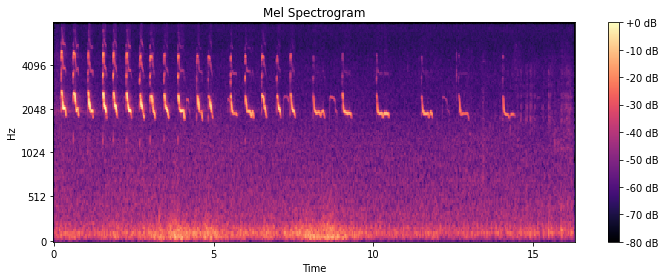

array([[-64.71117 , -55.69171 , -50.05423 , ..., -51.57789 , -51.175842,
        -57.131897],
       [-59.064415, -48.04924 , -38.052475, ..., -43.804596, -43.238342,
        -51.87215 ],
       [-52.423637, -38.666504, -32.627846, ..., -38.832558, -40.14118 ,
        -49.42119 ],
       ...,
       [-80.      , -69.59519 , -65.68159 , ..., -67.66119 , -69.43354 ,
        -80.      ],
       [-80.      , -68.51784 , -66.73211 , ..., -68.75768 , -71.9196  ,
        -80.      ],
       [-80.      , -78.75734 , -75.8751  , ..., -78.46974 , -80.      ,
        -80.      ]], dtype=float32)

In [29]:
audio_file_path = "data/audio/1A_200_203_Tringa_totanus.mp3"
generate_spectrogram(audio_file_path=audio_file_path)